In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Title: Communities and Crime

Abstract: Communities within the United States. The data combines socio-economic data 
from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime 
data from the 1995 FBI UCR.

-----------------------------------------------------------------------------------------

Data Set Characteristics:  Multivariate
Attribute Characteristics: Real
Associated Tasks: Regression
Number of Instances: 1994
Number of Attributes: 128
Missing Values? Yes
Area: Social
Date Donated: 2009-07-13

-----------------------------------------------------------------------------------------

Source:

Creator: Michael Redmond (redmond 'at' lasalle.edu); Computer Science; La Salle 
University; Philadelphia, PA, 19141, USA
-- culled from 1990 US Census, 1995 US FBI Uniform Crime Report, 1990 US Law 
Enforcement Management and Administrative Statistics Survey, available from ICPSR at U 
of Michigan.
-- Donor: Michael Redmond (redmond 'at' lasalle.edu); Computer

/Users/AymericLepine/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Title: Communities and Crime

Abstract: Communities within the United States. The data combines socio-economic data 
from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime 
data from the 1995 FBI UCR.

-----------------------------------------------------------------------------------------

Data Set Characteristics:  Multivariate
Attribute Characteristics: Real
Associated Tasks: Regression
Number of Instances: 1994
Number of Attributes: 128
Missing Values? Yes
Area: Social
Date Donated: 2009-07-13

-----------------------------------------------------------------------------------------

Source:

Creator: Michael Redmond (redmond 'at' lasalle.edu); Computer Science; La Salle 
University; Philadelphia, PA, 19141, USA
-- culled from 1990 US Census, 1995 US FBI Uniform Crime Report, 1990 US Law 
Enforcement Management and Administrative Statistics Survey, available from ICPSR at U 
of Michigan.
-- Donor: Michael Redmond (redmond 'at' lasalle.edu); Computer

Index(['OtherPerCap', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps',
       'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop',
       'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol',
       'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian',
       'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz',
       'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
       'LemasGangUnitDeploy', 'PolicBudgPerPop'],
      dtype='object')
(1993, 101)
0.15363773206221795
0.25


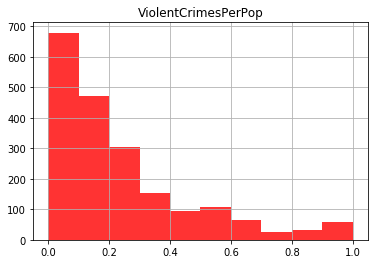

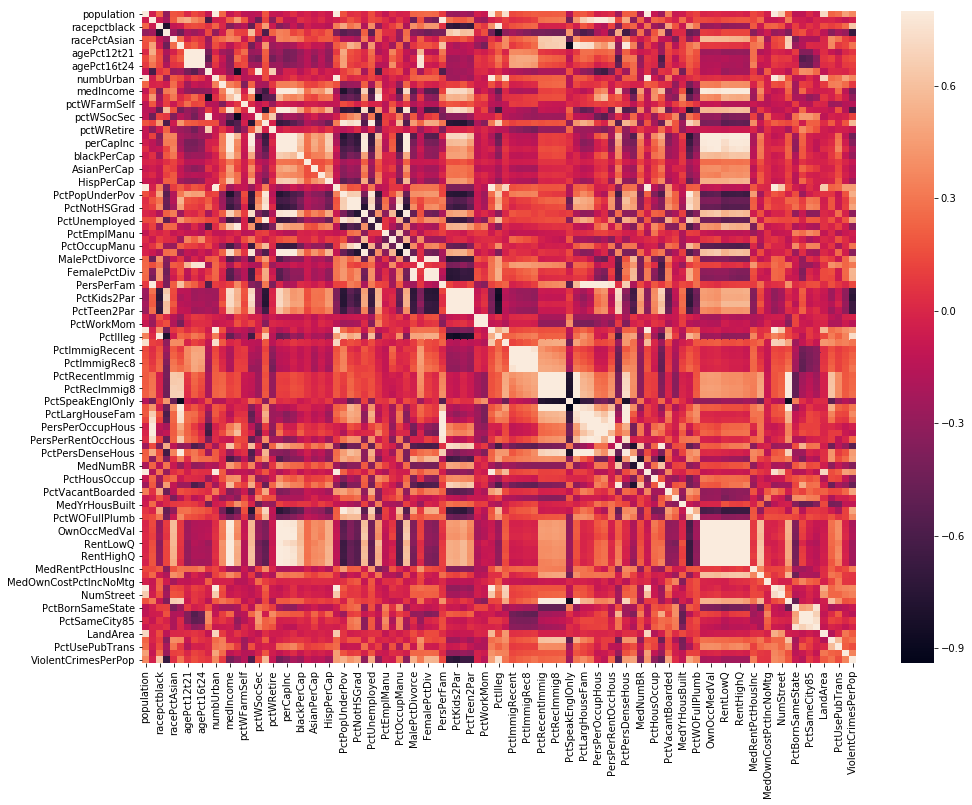

chi2 =  9475.916931283125
p-value =  0.004014065951999552
degree of freedom =  9114
0.22610777628350298


Jean.ipynb:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  "import matplotlib.pyplot as plt\n",
Jean.ipynb:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  "import scipy\n",
Jean.ipynb:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  "from sklearn.preprocessing import StandardScaler\n",
Jean.ipynb:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.

[[ 89   0   5   0]
 [  0 111   0   0]
 [ 10  10  90   0]
 [  0  74  10   0]]
Accuracy0.7268170426065163


In [2]:
%run read&clean.ipynb
%run Jean.ipynb

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

list_correlation = ['fold','agePct12t29', 'agePct65up', 'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85', 'PctSameCity85', 'PctSameState85', 'perCapInc', 'whitePerCap', 'blackPerCap','indianPerCap', 'AsianPerCap', 'HispPerCap', 'PctImmigRecent', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig10', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctEmploy', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'NumInShelters', 'NumStreet', 'PctUnemployed', 'NumUnderPov', 'PctPopUnderPov', 'PersPerFam', 'NumIlleg', 'PctIlleg', 'NumImmig', 'TotalPctDiv','medIncome', 'pctWWage', 'householdsize', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc', 'MedYrHousBuilt', 'MedRent', 'MedRentPctHousInc', 'LemasPctOfficDrugUn', 'ViolentCrimesPerPop']
correlation_df = pd.DataFrame()
df_clean_columns = data_clean.columns

for i in range(0, len(list_correlation)):
    if list_correlation[i] not in df_clean_columns:
        list_correlation.remove(df_clean_columns[i])
correlation_df = df_clean[list_correlation]

for j in range (0, len(list_correlation)):
    if type(correlation_df[list_correlation[j]][1]) is not float:
        print(list_correlation[j])
        

correlation_df_fold_1 = correlation_df[correlation_df['fold']==1]
correlation_df_fold_1 = correlation_df_fold_1.drop(columns = 'fold')
correlation_df_fold_1 = correlation_df_fold_1.astype(float).corr()

correlation_df_fold_2 = correlation_df[correlation_df['fold']==2]
correlation_df_fold_2 = correlation_df_fold_2.drop(columns = 'fold')
correlation_df_fold_2 = correlation_df_fold_2.astype(float)

df_fold_3 = correlation_df[correlation_df['fold']==3]
df_fold_3 = df_fold_3.drop(columns = 'fold')

#Simple heatmap

sns.heatmap(correlation_df_fold_2, cmap = 'GnBu')
plt.show()

#Heatmap of correlation coefficient 
sns.heatmap(correlation_df_fold_1, cmap = 'GnBu')
plt.show()

#Identify higher correlation coefficent

columns = correlation_df_fold_1.columns
for i in range (0, len(columns)):
    for j in range(0, len(correlation_df_fold_1)):
        if (correlation_df_fold_1[columns[i]][j] > 0.8) & (correlation_df_fold_1[columns[i]][j] != 1):
            print(columns[i], columns[j])

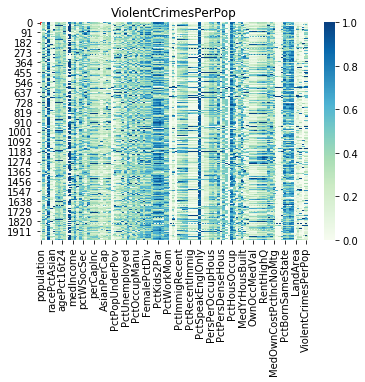

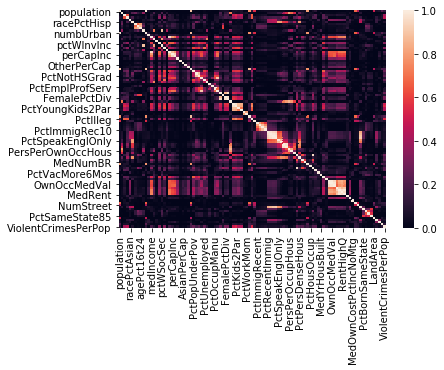

Determination coefficient between 0.7 and 0.8 population NumIlleg 0.783540573041492
Determination coefficient between 0.7 and 0.8 householdsize PersPerFam 0.7143637379894577
Determination coefficient between 0.7 and 0.8 householdsize PersPerOccupHous 0.7970307533036676
Determination coefficient between 0.7 and 0.8 racePctHisp PctSpeakEnglOnly 0.7931997591770562
Determination coefficient between 0.7 and 0.8 racePctHisp PctNotSpeakEnglWell 0.7963881223962999
Determination coefficient between 0.7 and 0.8 racePctHisp PctPersDenseHous 0.772456054528342
Determination coefficient between 0.7 and 0.8 agePct65up pctWWage 0.7032533655905377
Determination coefficient between 0.7 and 0.8 numbUrban NumIlleg 0.7686334690627957
Determination coefficient between 0.7 and 0.8 numbUrban HousVacant 0.7880850218105938
Determination coefficient between 0.7 and 0.8 medIncome perCapInc 0.7997921420566793
Determination coefficient between 0.7 and 0.8 medIncome whitePerCap 0.7051375321911892
Determination coeff

In [4]:
data_clean = data_clean.astype(float)

#Simple heatmap
sns.heatmap(data_clean, cmap = 'GnBu')
plt.show()

#Correlation heatmap 
sns.heatmap(data_clean.astype(float).corr()**2)
plt.show()


df_clean_correlation = data_clean.astype(float).corr()**2
columns_df_clean = df_clean_correlation.columns
determination_coefficient_first = ''
determination_coefficient_second = ''
determination_coefficient_third = ''

#Identification of most import correlation / determination coefficient 
for i in range (0, len(columns_df_clean)):
    for j in range(0, len(df_clean_correlation)):
        if (df_clean_correlation[columns_df_clean[i]][j] > 0.7) & (df_clean_correlation[columns_df_clean[i]][j] <= 0.8):
            determination_coefficient_first+=('Determination coefficient between 0.7 and 0.8 '+str(columns_df_clean[i])+' '+str(columns_df_clean[j])+ ' '+str(df_clean_correlation[columns_df_clean[i]][j])+ '\n')
        
        elif (df_clean_correlation[columns_df_clean[i]][j] > 0.8) & (df_clean_correlation[columns_df_clean[i]][j] <= 0.9):
            determination_coefficient_second+=('Determination coefficient between 0.8 and 0.9 '+str(columns_df_clean[i])+' '+str(columns_df_clean[j])+' '+str(df_clean_correlation[columns_df_clean[i]][j])+'\n')
            
        elif (df_clean_correlation[columns_df_clean[i]][j] > 0.9) & (df_clean_correlation[columns_df_clean[i]][j] <= 0.95):
            determination_coefficient_third+=('Determination coefficient between 0.9 and 0.95 '+str(columns_df_clean[i])+' '+str(columns_df_clean[j])+' '+str(df_clean_correlation[columns_df_clean[i]][j])+'\n')
        
edouard_text = determination_coefficient_first+determination_coefficient_second+determination_coefficient_third
print(edouard_text)

In [5]:
corrT = data_clean.astype(float).corr()
corrT = corrT.sort_values(by=['ViolentCrimesPerPop'])
corrT['ViolentCrimesPerPop']

PctKids2Par           -0.738550
PctFam2Par            -0.706857
racePctWhite          -0.684576
PctYoungKids2Par      -0.666184
PctTeen2Par           -0.661809
pctWInvInc            -0.576035
PctPersOwnOccup       -0.525398
PctHousOwnOcc         -0.470657
medFamInc             -0.439186
medIncome             -0.424436
MedNumBR              -0.356975
perCapInc             -0.351909
PctOccupMgmtProf      -0.338737
PctEmploy             -0.331986
PctHousOccup          -0.319326
PctBSorMore           -0.314331
pctWWage              -0.306141
blackPerCap           -0.275556
RentLowQ              -0.252425
HispPerCap            -0.244362
RentMedian            -0.240986
PctSpeakEnglOnly      -0.240752
MedRent               -0.240342
RentHighQ             -0.232779
OwnOccLowQuart        -0.210813
whitePerCap           -0.209095
OwnOccMedVal          -0.190977
OwnOccHiQuart         -0.172284
AsianPerCap           -0.155497
PctSameHouse85        -0.154914
                         ...   
PctLargH

In [6]:
data_clean_complete = data_clean.copy()
first_quartile = 0.07
median = 0.15
third_quartile = 0.33

data_clean_complete['ViolentCrimesPerPopLevel'] = None

for i in range (0, len(data_clean_complete)):
    if data_clean_complete['ViolentCrimesPerPop'][i] <= first_quartile :
        data_clean_complete['ViolentCrimesPerPopLevel'][i] = 'Low'
    elif (data_clean_complete['ViolentCrimesPerPop'][i] > first_quartile) & (data_clean_complete['ViolentCrimesPerPop'][i] <= median):
        data_clean_complete['ViolentCrimesPerPopLevel'][i] = 'Medium Low'
    elif (data_clean_complete['ViolentCrimesPerPop'][i] > median) & (data_clean_complete['ViolentCrimesPerPop'][i] <= third_quartile):
        data_clean_complete['ViolentCrimesPerPopLevel'][i] = 'Medium High'
    elif (data_clean_complete['ViolentCrimesPerPop'][i] > third_quartile):
        data_clean_complete['ViolentCrimesPerPopLevel'][i] = 'High'

/Users/AymericLepine/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/AymericLepine/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/AymericLepine/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/AymericLepine/anaconda3/lib/python3.6/sit

In [8]:
composants = ['NumIlleg', 'PctHousLess3BR', 'PctNotHSGrad', 'PctVacantBoarded', 'PctHousNoPhone', 'PctUnemployed', 'PctPopUnderPov', 'MalePctDivorce', 'TotalPctDiv', 'FemalePctDiv', 'pctWPubAsst', 'racepctblack', 'PctIlleg', 'ViolentCrimesPerPopLevel']
column = data_clean_complete.columns
print(column)
for i in range(0, len(column)):
    if column[i] not in composants:
        data_clean_complete.drop(columns=[column[i]])

Index(['population', 'householdsize', 'racepctblack', 'racePctWhite',
       'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29',
       'agePct16t24', 'agePct65up',
       ...
       'PctBornSameState', 'PctSameHouse85', 'PctSameCity85', 'PctSameState85',
       'LandArea', 'PopDens', 'PctUsePubTrans', 'LemasPctOfficDrugUn',
       'ViolentCrimesPerPop', 'ViolentCrimesPerPopLevel'],
      dtype='object', length=102)


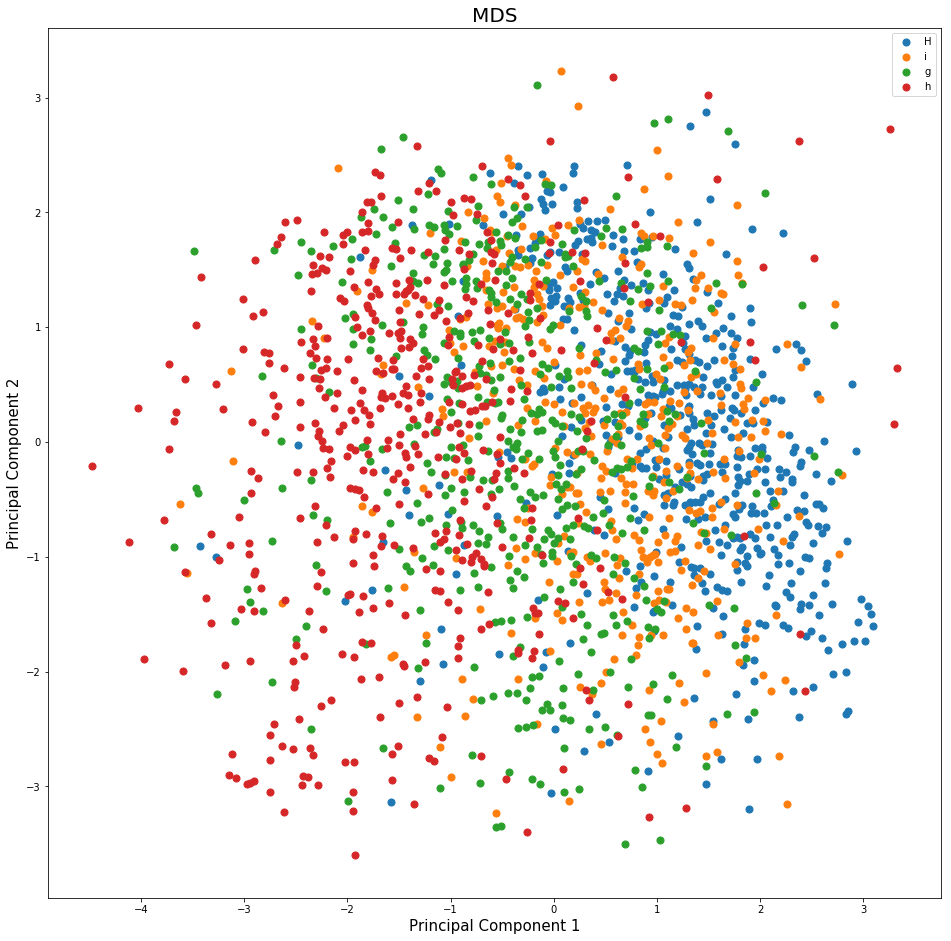

In [10]:
target = data_clean_complete[['ViolentCrimesPerPopLevel']]
#data_clean_complete = data_clean_complete.drop(columns=['ViolentCrimesPerPopLevel'])

from sklearn.manifold import MDS
mds = MDS(n_components=2)
principalComponents = mds.fit_transform(data_clean)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

#data_clean_complete = data_clean_complete.drop(columns = ['ViolentCrimesPerPopLevel'])
finalDf = pd.concat([principalDf, target], axis = 1)
#print(finalDf)
fig = plt.figure(figsize = (16,16))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('MDS', fontsize = 20)
targets = ['Low', 'Medium Low', 'Medium High', 'High']
colors = ['y', 'b', 'r', 'o']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['ViolentCrimesPerPopLevel'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , s = 50)
    ax.legend(target)
    ax.grid()
plt.show()

In [33]:

target= pd.DataFrame({'target':targets})
print(target)

        target
0          Low
1   Medium Low
2  Medium High
3         High


In [35]:
from sklearn.manifold import LocallyLinearEmbedding

numberOfNeighbors = [3, 5, 8, 10, 12, 15]

    
for i in range(0, len(numberOfNeighbors)):
    lle = LocallyLinearEmbedding(n_components=2, n_neighbors=numberOfNeighbors[i])
    principalComponents = lle.fit_transform(data_clean_complete)
    principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])
    finalDf = pd.concat([principalDf, target], axis = 1)
    fig = plt.figure(figsize=(16, 16))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('Principal Component 1', fontsize=15)
    ax.set_ylabel('Principal Component 2', fontsize=15)
    title = 'LocallyLinearEmbedding, number of neighbors = '+ str(numberOfNeighbors[i])
    ax.set_title(title, fontsize=20)
    targets = ['Low', 'Medium Low', 'Medium High', 'High']
    colors = ['b', 'g', 'r', 'k']
    for target, color in zip(targets, colors):
        indicesToKeep = finalDf['ViolentCrimesPerPopLevel'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                    , finalDf.loc[indicesToKeep, 'principal component 2']
                    , c=color
                    , s=50)
        ax.legend(targets)
        ax.grid()

        plt.show()

TypeError: cannot concatenate object of type "<class 'str'>"; only pd.Series, pd.DataFrame, and pd.Panel (deprecated) objs are valid